In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

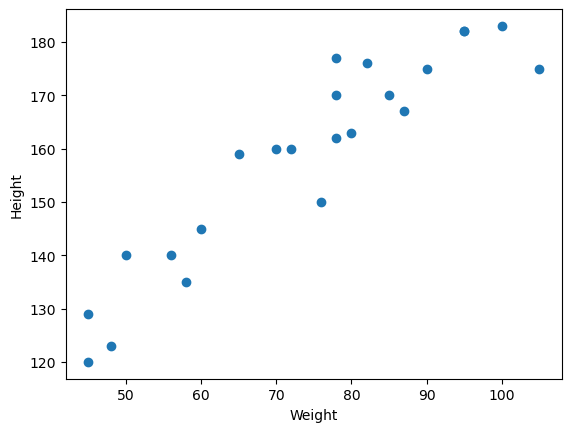

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [5]:
X=df[['Weight']]
y=df['Height']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

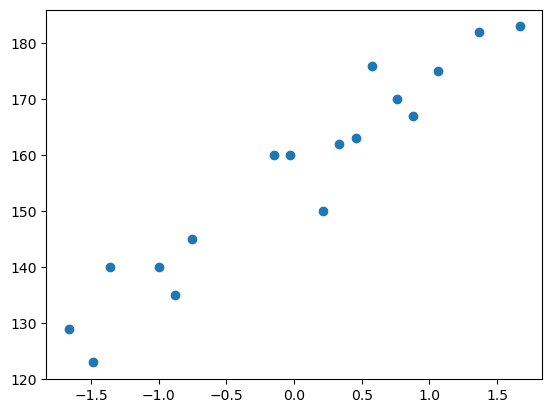

In [9]:
plt.scatter(X_train,y_train)

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
regressor = LinearRegression()

In [12]:
regressor

LinearRegression()

In [13]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


In [15]:
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
print(regressor.coef_)
print(regressor.intercept_)


[17.2982057]
156.47058823529412


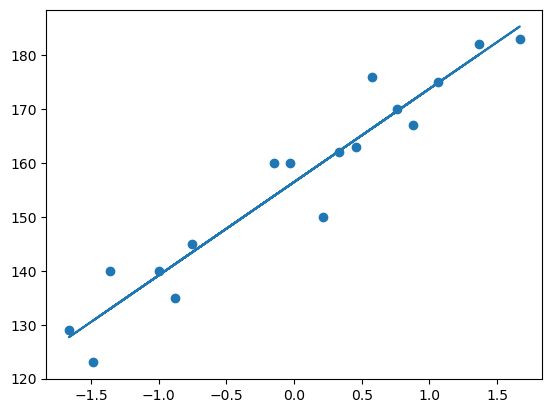

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [30]:
y_pred_test = regressor.predict(X_test)
print(y_pred_test.shape)
print(y_pred_test)


(6,)
[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


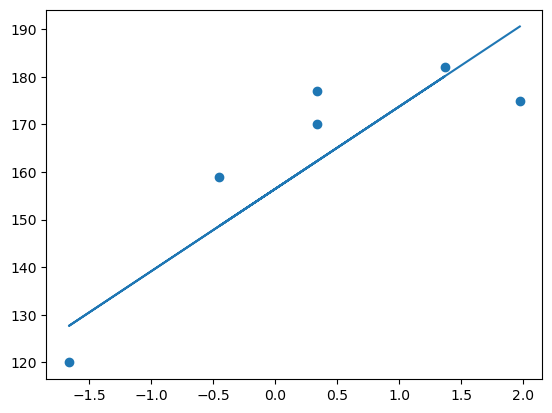

In [19]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [21]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.7360826717981276


In [26]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

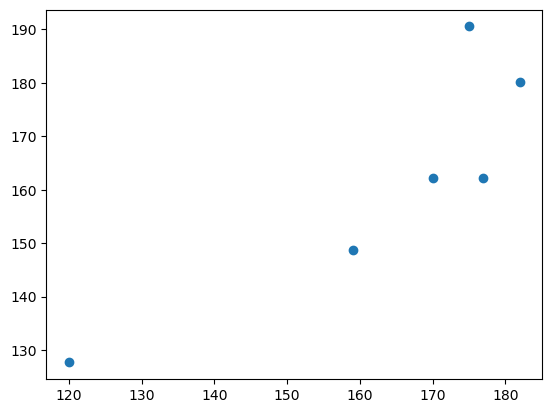

In [27]:
plt.scatter(y_test,y_pred_test)

In [28]:
residuals=y_test-y_pred_test

residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

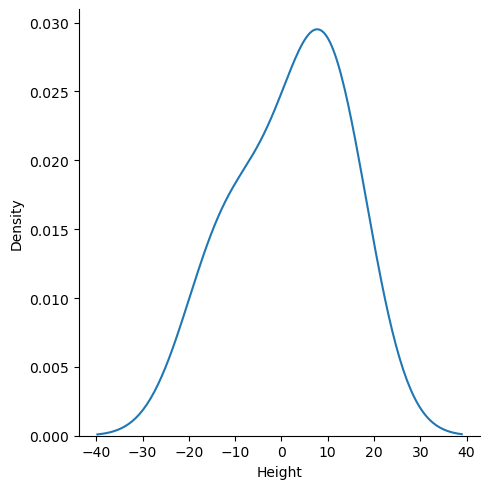

In [29]:
import seaborn as sns
sns.displot(residuals,kind="kde")

In [23]:
import statsmodels.api as sm


In [24]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_test) 


In [25]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                       0.664
Time:                        12:55:07   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
